In [1]:
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
import numpy as np
import os
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.datasets import make_blobs
from sklearn.impute import SimpleImputer

In [2]:
with open('/Users/travelingshoes/Desktop/final_project_github/Weather data/Morgan_Weather_Data.xlsx', 'r', encoding='utf-8', errors='ignore') as f:
    data = f.read()

# Read in data from CSV file
weber_data = pd.ExcelFile("Weber_Weather_Data.xlsx")
#morgan_data = pd.read_csv('Morgan_Weather_Data.xlsx')

# Get the sheets
weber_data.sheet_names

['Sheet1']

In [3]:
# Get the weber_info from the crowdfunding_info worksheet. 
weber_info_df = pd.read_excel(weber_data, sheet_name='Sheet1')
weber_info_df.head()

,Date,Causey Reservoir (10137290) % of Reservoir Capacity Start of Day Values,Pineview Reservoir (10139000) % of Reservoir Capacity Start of Day Values,Weber SWE,Dry = 0 Flooded =1 Not = 2,Ben Lomond Peak (332) Snow Water Equivalent (in) Start of Day Values,Ben Lomond Trail (333) Snow Water Equivalent (in) Start of Day Values,Lightning Ridge (1056) Snow Water Equivalent (in) Start of Day Values,UTAH SWE,OgdenTemp_Max (°F),...,OgdenRain_sum (inch),OgdenSnowfall_sum (inch),OgdenWindspeed_10m_max (mp/h),hooperTemp_Max (°F),hooperTemp_min (°F),hooperTemp_mean (°F),hooperPrecipitation_sum (inch),hooperRain_sum (inch),hooperSnowfall_sum (inch),hooperWindspeed_10m_max (mp/h)
0,1982-10-01,56,70,63.0,2,2.5,1.0,NaN,1.4,49.3,...,0.387,0.0,10.8,49.5,44.0,46.7,0.239,0.239,0.0,14.0
1,1982-10-02,56,70,63.0,0,3.1,1.0,NaN,1.4,57.8,...,0.000,0.0,8.2,56.3,44.0,50.7,0.000,0.000,0.0,9.3
2,1982-10-03,56,70,63.0,0,2.9,0.9,NaN,1.3,59.7,...,0.000,0.0,5.1,57.4,44.9,51.5,0.000,0.000,0.0,5.2
3,1982-10-04,56,70,63.0,0,2.7,0.6,NaN,1.3,65.1,...,0.056,0.0,8.9,62.2,48.9,55.3,0.036,0.036,0.0,11.6
4,1982-10-05,44,70,57.0,0,2.5,0.2,NaN,1.2,50.3,...,0.115,0.0,8.1,50.0,43.8,47.4,0.084,0.084,0.0,11.9


In [9]:
weber_drop_info_df = weber_info_df.dropna()
print(weber_drop_info_df)


            Date  \
7962  2004-07-19   
7963  2004-07-20   
7964  2004-07-21   
7965  2004-07-22   
7966  2004-07-23   
...          ...   
14787 2023-03-27   
14788 2023-03-28   
14789 2023-03-29   
14790 2023-03-30   
14791 2023-03-31   

       Causey Reservoir (10137290) % of Reservoir Capacity Start of Day Values  \
7962                                                  86                         
7963                                                  85                         
7964                                                  84                         
7965                                                  82                         
7966                                                  81                         
...                                                  ...                         
14787                                                 63                         
14788                                                 62                         
14789                

In [19]:
X = weber_drop_info_df[['Weber SWE', 'Ben Lomond Peak (332) Snow Water Equivalent (in) Start of Day Values', 'Ben Lomond Trail (333) Snow Water Equivalent (in) Start of Day Values', 'Lightning Ridge (1056) Snow Water Equivalent (in) Start of Day Values', 'UTAH SWE', 'OgdenTemp_Max (°F)', 'OgdenRain_sum (inch)', 'OgdenSnowfall_sum (inch)', 'OgdenWindspeed_10m_max (mp/h)', 'hooperTemp_Max (°F)', 'hooperTemp_min (°F)', 'hooperTemp_mean (°F)', 'hooperPrecipitation_sum (inch)', 'hooperRain_sum (inch)', 'hooperSnowfall_sum (inch)', 'hooperWindspeed_10m_max (mp/h)']]

y = weber_drop_info_df[['Causey Reservoir (10137290) % of Reservoir Capacity Start of Day Values', 'Dry = 0 Flooded =1 Not = 2', 'Pineview Reservoir (10139000) % of Reservoir Capacity Start of Day Values']]

In [20]:
#Training
X 



,Weber SWE,Ben Lomond Peak (332) Snow Water Equivalent (in) Start of Day Values,Ben Lomond Trail (333) Snow Water Equivalent (in) Start of Day Values,Lightning Ridge (1056) Snow Water Equivalent (in) Start of Day Values,UTAH SWE,OgdenTemp_Max (°F),OgdenRain_sum (inch),OgdenSnowfall_sum (inch),OgdenWindspeed_10m_max (mp/h),hooperTemp_Max (°F),hooperTemp_min (°F),hooperTemp_mean (°F),hooperPrecipitation_sum (inch),hooperRain_sum (inch),hooperSnowfall_sum (inch),hooperWindspeed_10m_max (mp/h)
7962,83.0,0.0,0.0,0.0,0.0,86.6,0.000,0.000,5.6,84.7,71.4,79.7,0.000,0.000,0.000,5.6
7963,82.5,0.0,0.0,0.0,0.0,85.8,0.078,0.000,6.8,84.1,74.9,80.5,0.060,0.060,0.000,10.5
7964,81.5,0.0,0.0,0.0,0.0,88.0,0.000,0.000,6.7,85.6,73.3,80.6,0.000,0.000,0.000,7.0
7965,80.5,0.0,0.0,0.0,0.0,90.3,0.000,0.000,9.3,88.2,71.8,81.9,0.059,0.059,0.000,12.3
7966,80.0,0.0,0.0,0.0,0.0,86.1,0.000,0.000,6.0,84.2,69.8,78.9,0.000,0.000,0.000,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14787,51.5,73.7,41.6,29.1,26.8,30.8,0.000,1.158,6.4,31.0,22.2,26.1,0.116,0.000,0.804,8.5
14788,50.5,74.1,41.7,29.3,27.0,40.7,0.000,0.000,7.6,38.9,19.4,29.2,0.000,0.000,0.000,9.4
14789,49.5,74.1,41.7,29.4,27.0,43.9,0.193,0.193,10.7,42.7,32.1,36.8,0.159,0.159,0.000,13.3
14790,48.0,75.6,42.7,29.9,27.5,34.7,0.032,1.874,8.2,34.4,29.5,32.0,0.184,0.024,1.105,9.6


In [21]:
#Testing
y 

,Causey Reservoir (10137290) % of Reservoir Capacity Start of Day Values,Dry = 0 Flooded =1 Not = 2,Pineview Reservoir (10139000) % of Reservoir Capacity Start of Day Values
7962,86,0,80
7963,85,0,80
7964,84,0,79
7965,82,0,79
7966,81,0,79
...,...,...,...
14787,63,0,40
14788,62,0,39
14789,61,0,38
14790,59,0,37


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()




In [24]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

In [25]:
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")



Training Score: 0.7880192288832691
Testing Score: 0.7984346222300805


ValueError: could not broadcast input array from shape (3,) into shape (1,)

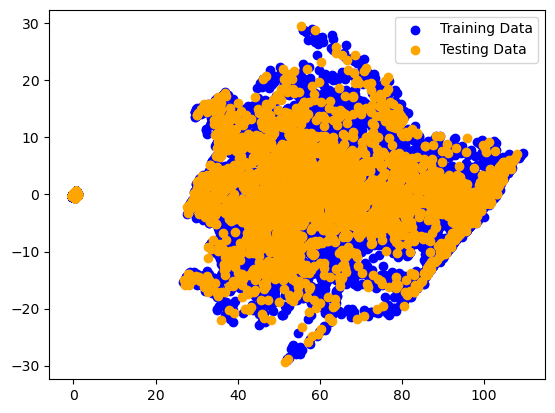

In [26]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
plt.show()

In [18]:
classifier.fit(X_train, y_train)

NameError: name 'classifier' is not defined

In [ ]:
y_pred = classifier.predict(X_test)
results = pd.ExcelFile({"Prediction": y_pred, "Actual": y_test}).reset_index(drop=True)
results.head(20)